In [1]:
import pandas as pd
import seaborn as sb
low_memory=False
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

In [2]:
filename = 'clean_2015.csv'
df = pd.read_csv(filename)

In [3]:
df.shape

df.describe()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776645 entries, 0 to 776644
Data columns (total 22 columns):
num_bo                    776645 non-null int64
ano_bo                    776645 non-null int64
id_delegacia              776645 non-null int64
nome_departamento         776645 non-null object
nome_seccional            776645 non-null object
delegacia                 776645 non-null object
nome_departamento_circ    776645 non-null object
nome_seccional_circ       776645 non-null object
nome_delegacia_circ       776645 non-null object
ano                       776645 non-null int64
mes                       776645 non-null int64
flag_status               776645 non-null object
rubrica                   776645 non-null object
desdobramento             31222 non-null object
conduta                   656067 non-null object
latitude                  690093 non-null float64
longitude                 690091 non-null float64
cidade                    776645 non-null object
logradouro 

In [4]:
df.sample(10)

,num_bo,ano_bo,id_delegacia,nome_departamento,nome_seccional,delegacia,nome_departamento_circ,nome_seccional_circ,nome_delegacia_circ,ano,mes,flag_status,rubrica,desdobramento,conduta,latitude,longitude,cidade,logradouro,numero_logradouro,flag_status_2,location
14116,403675,2015,900020,DIPOL - DEPTO DE INTELIGENCIA,DELEGACIA ELETRONICA,DELEGACIA ELETRONICA,DECAP,DEL.SEC.5Âº LESTE,21Âº D.P. VILA MATILDE,2015,3,C,Furto (art. 155),NaN,VEICULO,NaN,NaN,S.PAULO,Rua Frei Mont Alverne,521,C,NaN
601008,67217,2015,900020,DIPOL - DEPTO DE INTELIGENCIA,DELEGACIA ELETRONICA,DELEGACIA ELETRONICA,DECAP,DEL.SEC.1Âº CENTRO,01Âº D.P. SE,2015,1,C,Furto (art. 155),NaN,TRANSEUNTE,-23.539826,-46.632899,S.PAULO,RUA FLORENCIO DE ABREU,500,C,POINT(-23.539826231735901 -46.632899227515502)
612297,8,2015,10311,DECAP,DEL.SEC.5Âº LESTE,58Âº D.P. VILA FORMOSA,DECAP,DEL.SEC.5Âº LESTE,58Âº D.P. VILA FORMOSA,2015,1,C,Roubo (art. 157),NaN,ESTABELECIMENTO COMERCIAL,-23.570502,-46.539765,S.PAULO,AVENIDA JOAO XXIII,109,C,POINT(-23.570502294463498 -46.5397646597415)
354787,4818,2015,30103,DEMACRO,DEL.SEC.SANTO ANDRÃ‰,02Âº D.P. SANTO ANDRÃ‰,DEMACRO,DEL.SEC.SANTO ANDRÃ‰,02Âº D.P. SANTO ANDRÃ‰,2015,8,C,"Furto qualificado (art. 155, Â§4o.)",NaN,ESTABELECIMENTO COMERCIAL,-23.623179,-46.536903,S.ANDRE,AVENIDA UTINGA,1211,C,POINT(-23.623179259 -46.536902843)
432913,4369,2015,30304,DEMACRO,DEL.SEC.MOGI DAS CRUZES,DEL.POL.ITAQUAQUECETUBA,DEMACRO,DEL.SEC.MOGI DAS CRUZES,DEL.POL.ITAQUAQUECETUBA,2015,6,C,Furto (art. 155),NaN,VEICULO,-23.482184,-46.353280,ITAQUAQUECETUBA,RUA CAXAMBÃš,0,C,POINT(-23.482184479999901 -46.353279621999903)
292528,5381,2015,30440,DEMACRO,DEL.SEC.OSASCO,10Âº D.P. OSASCO,DEMACRO,DEL.SEC.OSASCO,03Âº D.P. OSASCO,2015,10,C,LesÃ£o corporal (art. 129),NaN,NaN,-23.509976,-46.776177,OSASCO,RUA CURITIBA,20,C,POINT(-23.509976284999901 -46.776176529999901)
13197,1091,2015,30615,DEMACRO,DEL.SEC.FRANCO DA ROCHA,01Âº D.P. CAIEIRAS,DEMACRO,DEL.SEC.FRANCO DA ROCHA,01Âº D.P. CAIEIRAS,2015,12,C,Furto (art. 155),NaN,VEICULO,-23.381622,-46.720692,CAIEIRAS,RUA CODORNA,205,C,POINT(-23.381621510594901 -46.7206915379112)
91693,175072,2015,900020,DIPOL - DEPTO DE INTELIGENCIA,DELEGACIA ELETRONICA,DELEGACIA ELETRONICA,DECAP,DEL.SEC.3Âº OESTE,23Âº D.P. PERDIZES,2015,2,C,Furto (art. 155),NaN,TRANSEUNTE,-23.528622,-46.679368,S.PAULO,RUA TURIASSU,1840,C,POINT(-23.528622176999399 -46.679368031228698)
504854,3309,2015,30415,DEMACRO,DEL.SEC.CARAPICUIBA,DEL.POL.SANTANA DE PARNAIBA,DEMACRO,DEL.SEC.CARAPICUIBA,DEL.POL.SANTANA DE PARNAIBA,2015,11,T,HomicÃ­dio simples (art. 121),NaN,NaN,-23.409531,-46.899644,SANTANA DE PARNAIBA,RUA ESPACIAL,0,T,POINT(-23.409530772 -46.899643631999901)
40855,4916,2015,30418,DEMACRO,DEL.SEC.OSASCO,05Âº D.P. OSASCO,DEMACRO,DEL.SEC.OSASCO,05Âº D.P. OSASCO,2015,8,C,Furto (art. 155),NaN,VEICULO,-23.527188,-46.778893,OSASCO,RUA VIRGÃNIA AURORA RODRIGUES,527,C,POINT(-23.5271878723333 -46.7788929443333)


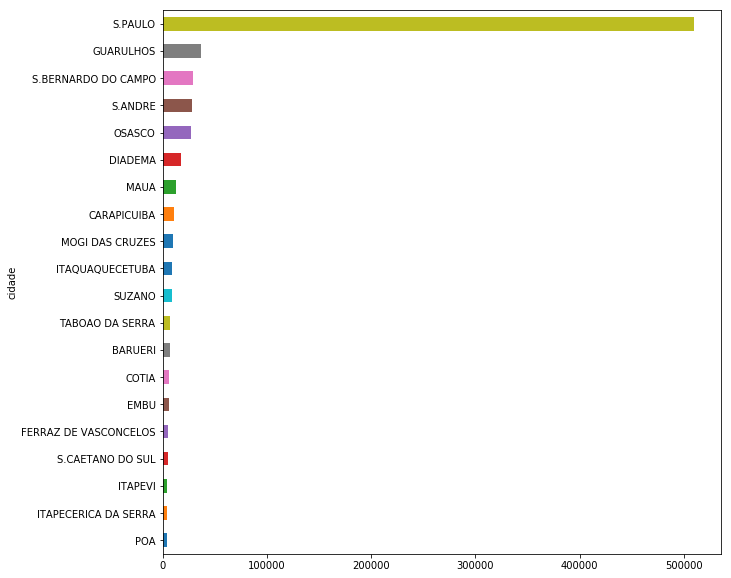

In [5]:
df.groupby('cidade').size().sort_values().tail(20).plot(kind='barh', figsize=(10,10))

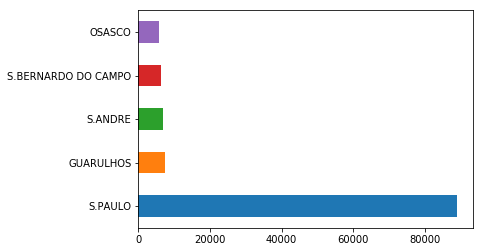

In [6]:
df.query('conduta == "VEICULO"')['cidade'].value_counts().head().plot(kind='barh')


In [7]:
df.query('conduta == "VEICULO"')['cidade'].value_counts().head()

S.PAULO                88977
GUARULHOS               7444
S.ANDRE                 6850
S.BERNARDO DO CAMPO     6441
OSASCO                  5861
Name: cidade, dtype: int64

In [8]:
df.query('conduta == "VEICULO" and cidade == "OSASCO"').DOCUMENTO.value_counts().describe()


AttributeError: 'DataFrame' object has no attribute 'DOCUMENTO'

In [9]:
df.query('conduta == "VEICULO" and cidade == "OSASCO"').RUBRICA.value_counts().describe()

AttributeError: 'DataFrame' object has no attribute 'RUBRICA'

In [10]:
df['rubrica'].value_counts().to_frame().head(10)

,rubrica
Roubo (art. 157),315519
Furto (art. 155),284104
"Furto qualificado (art. 155, Â§4o.)",50425
LesÃ£o corporal (art. 129),44138
LesÃ£o corporal culposa na direÃ§Ã£o de veÃ­culo automotor (Art. 303),37123
LesÃ£o corporal (art 129 Â§ 9Âº),13719
"Drogas sem autorizaÃ§Ã£o ou em desacordo (Art.33, caput)",10067
"A.I.-Drogas sem autorizaÃ§Ã£o ou em desacordo (Art.33, caput)",4384
A.I.-Roubo (art. 157),4144
HomicÃ­dio simples (art. 121),3992


In [11]:
df.query('rubrica == "Roubo (art. 157)"')['cidade'].value_counts().to_frame().head(10)

,cidade
S.PAULO,204922
GUARULHOS,15187
S.ANDRE,13102
S.BERNARDO DO CAMPO,12710
OSASCO,11802
DIADEMA,10198
MAUA,5761
CARAPICUIBA,5172
ITAQUAQUECETUBA,4262
TABOAO DA SERRA,3414
